# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



Entropy means is used to determine the cost for a piece of information happening and cost is calcaulted by how rare that information is. So the rarer the chance that the event will happen the more you have to pay (in bits). So for soemthing that is so likely to happen you would not pay that many bits for it.

#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

In [34]:
%pip install matplotlib
%pip install numpy
%pip install pandas 
%pip install seaborn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[0.0, 1.0, 0.9182958340544894, 1.0, 0.9709505944546688, 1.0, 0.9852281360342515, 0.954434002924965, 0.9910760598382222, 1.0, 0.9940302114769566, 1.0, 0.9957274520849256, 0.9852281360342515, 0.9967916319816367, 0.9886994082884974, 0.9975025463691153, 1.0, 0.9980008838722995, 1.0, 0.998363672593813, 1.0, 0.9986359641585719, 1.0, 0.9988455359952018, 0.9957274520849256, 0.9990102708804813, 0.9963165195589622, 0.9922666387194963, 0.9967916319816367, 0.9992492479956566, 1.0, 0.9993375041688846, 1.0, 0.9994110647387552, 1.0, 0.9994730201859837, 0.9980008838722995, 0.9957274520849256, 0.9927744539878083, 0.9892452969285004, 0.9852281360342515, 0.9807983646944296, 0.976020648236615, 0.9709505944546688, 0.9656361333706097, 0.9601186626422924, 0.954434002924965, 0.9486131982385807, 0.9426831892554923, 0.9366673818775625, 0.9470622432515329, 0.9561550236844027, 0.9509560484549724, 0.9456603046006401, 0.940285958670631, 0.9348490242345946, 0.9293636260137188, 0.9392547207311598, 0.9480782435939054,

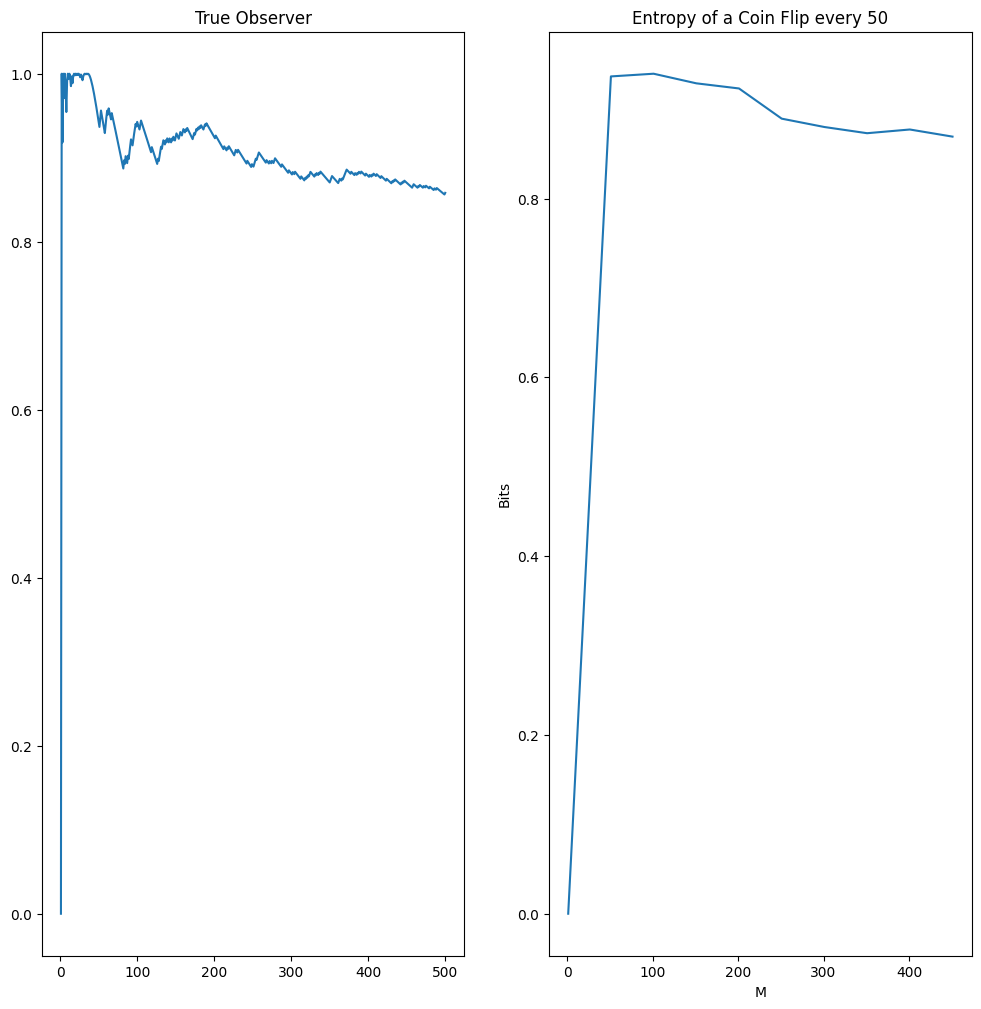

Calc entropy:   0.8812908992306927  Result at end: 0.869321974551696


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import entropy
fig, ax = plt.subplots(1, 2, figsize=(12,12))  # 2 rows, 1 column

# Simulate a coin flip
def flip():
    flip_result = random.random()
    if flip_result < p_heads:
        data["heads"] += 1
    else:
        data["tails"] += 1

# Calculate experimental probabilities based on observed data
def calculate_probabilities(data):
    heads_count = data["heads"]
    tails_count = data["tails"]
    ex_p_heads = heads_count / (heads_count + tails_count)
    ex_p_tails = tails_count / (heads_count + tails_count)
    return [ex_p_heads, ex_p_tails]

# Calculate entropy using the experimental probabilities
def calculate_entropy():
    probabilities = calculate_probabilities(data)
    return entropy(probabilities, base=2)


# Define absolute probabilities for heads and tails
p_heads = 0.7
p_tails = 0.3

# Initialize a dictionary to track the number of heads and tails
data = {"heads": 0, "tails": 0}

# Create an array of 'm' values (number of coin flips)
m_values = np.arange(1, 501)

# Calculate entropy for different 'm' values
entropy_values_50 = []
true_entropy = entropy([p_heads, p_tails], base=2)
true_observer = []
for m in m_values:
    flip()
    true_observer.append(calculate_entropy())
    if (m - 1) % 50 == 0:
        entropy_values_50.append(calculate_entropy())

# Plot the results
print(true_observer)
ax[0].plot(np.arange(1,501), true_observer, label='True Entropy')
ax[1].plot(np.arange(1, 501,50), entropy_values_50, label="Every 50")
ax[1].set_title('Entropy of a Coin Flip every 50')
ax[0].set_title('True Observer')
plt.xlabel('M')
plt.ylabel('Bits')
plt.show()
print("Calc entropy:  ", true_entropy, " Result at end:", entropy_values_50[-1])   

#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



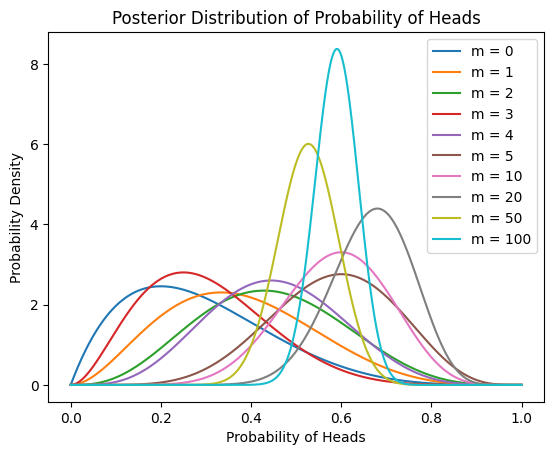

,# of flips (m),Mean,Variance
0,100.0,0.588785,0.002242
1,50.0,0.526316,0.004298
2,20.0,0.666667,0.007937
3,10.0,0.588235,0.013456
4,5.0,0.583333,0.018697
5,4.0,0.454545,0.020661
6,3.0,0.300000,0.019091
7,2.0,0.444444,0.024691
8,1.0,0.375000,0.026042
9,0.0,0.285714,0.025510


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd

def calculate_posterior_parameters(data, alpha, beta):
    """
    Calculates the posterior distribution parameters based on data, alpha, and beta.

    Args:
        data (array-like): Observed data (e.g., an array of measurements).
        alpha (float): Prior hyperparameter (shape parameter).
        beta (float): Prior hyperparameter (rate parameter).

    Returns:
        float: Posterior alpha (shape parameter).
        float: Posterior beta (rate parameter).

    The way this works is that the alpha and beta parameters of the beta distribution are updated based on the data. 
    So if we have a prior distribution with alpha=2 and beta=5, and we observe 3 heads and 2 tails, 
    the posterior distribution will have alpha=2+3=5 and beta=5+2=7.
    """
    num_heads = np.sum(data)
    num_tails = len(data) - num_heads

    posterior_alpha = alpha + num_heads
    posterior_beta = beta + num_tails

    return posterior_alpha, posterior_beta


#taken from AIMA textbook for aplha and beta
prior_alpha = 2
prior_beta = 5
# testing some other alpha and beta values, holds the same generic shape with the peak getting larger
# prior_alpha = 7
# prior_beta = 50
#flips required for the coin to be flipped, 0-5, 10, 20, 50, 100 time
flips = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

post_table = pd.DataFrame(columns=["# of flips (m)", "Mean", "Variance"])

# Plot the posterior distribution for different numbers of coin flips
for m in flips:
    # Step 1: Generate random data (0 or 1) for 'm' coin flips
    data = np.random.choice([0, 1], size=m, p=[p_tails, p_heads]) 
    
    # Step 2: Calculate posterior parameters using the observed data
    posterior_alpha, posterior_beta = calculate_posterior_parameters(data, prior_alpha, prior_beta) 
    
    # Step 3: Create an array of 'x' values for evaluating the posterior distribution
    x = np.linspace(0, 1, 1000)
    
    # Step 4: Compute the posterior distribution using the beta PDF
    posterior_dist = beta.pdf(x, posterior_alpha, posterior_beta)
    
    # Step 5: Calculate the posterior mean
    posterior_mean = beta.mean(posterior_alpha, posterior_beta)
    
    # Step 6: Plot the posterior distribution
    plt.plot(x, posterior_dist, label="m = {}".format(m))
    
    # Step 7: Update the DataFrame 'post_table' with posterior statistics
    post_table.loc[-1] = [m, posterior_mean, beta.var(posterior_alpha, posterior_beta)]
    post_table.index = post_table.index + 1
    post_table.sort_index(inplace=True)

# Step 8: Display the posterior distribution
plt.title('Posterior Distribution of Probability of Heads')
plt.xlabel('Probability of Heads')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
# Step 9: Display table, I use display becuase it makes it look better
display(post_table)


# The way I understood this 

It seems to basically modeling the tru probability after m numbers of flips. Similar to the 1/6 dice table that was shown in the standford stats review. Chat helped explained alot of this stuff and gave some good references the book was a little too high level but it gave me a direction.

### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

In [37]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [38]:
# Made a function to calculate the data sets
def make_dataset(m):
    X = 2 * np.random.rand(m, 1)  # column vector
    y = 4 + 3 * X + np.random.randn(m, 1)  # column vector
    return X, y

data_3 = make_dataset(3)
data_10 = make_dataset(10)
data_100 = make_dataset(100)

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

In [39]:
# to work with the github so you can modify the code 
%pip install -q git+https://github.com/pantelis-classes/PRML.git
%pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [40]:
# rip the code from the github, thanks professor I try to explain it in my own words
import numpy as np
import sys 
sys.path.append('/home/hk37/PRML/prml/liner/._regression')
from prml.linear._regression import Regression


class BayesianRegression(Regression):
    """Bayesian regression model.

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    

    """

    def __init__(self, alpha: float = 1., beta: float = 1.):
        """ Defines the parameters for the model
        """
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim: int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        """
        this is similar to the dervartiaon we did above with the posteriour probability from the preiovus problem where it calcaulatees the mean and the precision of the data. it uses the prior fucntions above
        """
        mean_prev, precision_prev = self._get_prior(np.size(x_train, 1))

        w_precision = precision_prev + self.beta * x_train.T @ x_train
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * x_train.T @ y_train,
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)
    """
    predict takes in the parameters and returns the mean and standard deviation of the predicted value. For example, if you give a sample it will predecti with a mulstvariate normal disturbitn and preform the dot prduct of the to gvie a y_sampel for it to be returned.
    Below the std is dervied from the beta and the x and w_cov by using the formula 1/beta + x @ w_cov @ x which is dervied from the book.
    """
    def predict(
        self,
        x: np.ndarray,
        return_std: bool = False,
        sample_size: int = None,
    ):
        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size,
            )
            y_sample = x @ w_sample.T
            return y_sample
        y = x @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(x @ self.w_cov * x, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y


In [41]:
model_3 = BayesianRegression(alpha=prior_alpha, beta=prior_beta)
model_10 = BayesianRegression(alpha=prior_alpha, beta=prior_beta)
print(data_3)
model_3.fit(data_3[0], data_3[1])

(array([[1.58962261],
       [1.00527419],
       [1.15380777]]), array([[7.36246255],
       [6.9812929 ],
       [6.49840768]]))


1.0


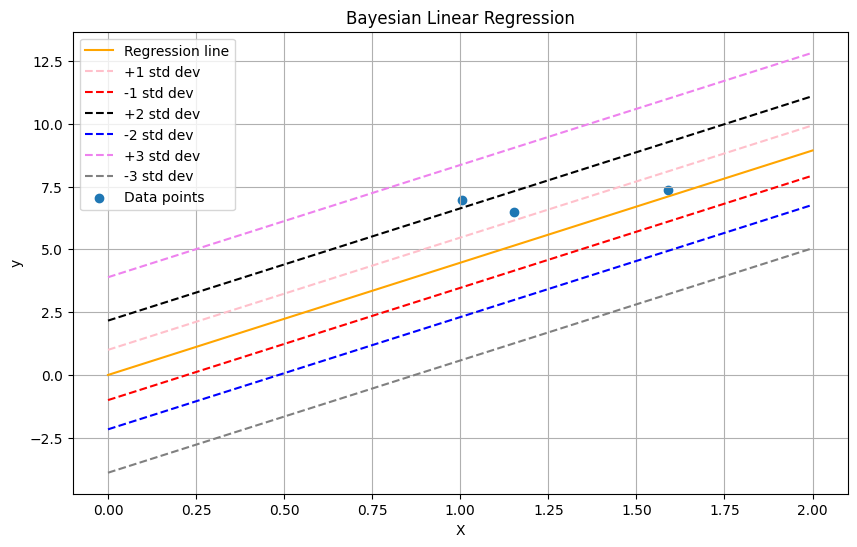

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Create example data (replace with your own data)

# Create Bayesian Ridge regression model
model = BayesianRegression()

# Fit the model to the data
model.fit(data_3[0], data_3[1])

# Generate a linspace for prediction
new_X = np.linspace(0, 2, 3).reshape(-1, 1)  # Adjust the range as needed

# Make predictions on the linspace
predictions, std_dev = model.predict(new_X, return_std=True)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.plot(new_X, predictions, color='orange', label='Regression line')
print(std_dev[0])
# i made the std_dev like this because thats the only way i can get it to print
plt.plot(new_X, predictions + std_dev[0], linestyle='--', color='pink', label='+1 std dev')
plt.plot(new_X, predictions - std_dev[0], linestyle='--', color='red', label='-1 std dev')
plt.plot(new_X, predictions + 2 * std_dev[1], linestyle='--', color='black', label='+2 std dev')
plt.plot(new_X, predictions - 2 * std_dev[1], linestyle='--', color='blue', label='-2 std dev')
plt.plot(new_X, predictions + 3 * std_dev[2], linestyle='--', color='violet', label='+3 std dev')
plt.plot(new_X, predictions - 3 * std_dev[2], linestyle='--', color='gray', label='-3 std dev')
plt.scatter(data_3[0], data_3[1], label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Bayesian Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

[1.         1.00136704 1.00545702 1.01223692 1.0216532  1.0336338
 1.0480908  1.06492334 1.08402077 1.10526568]


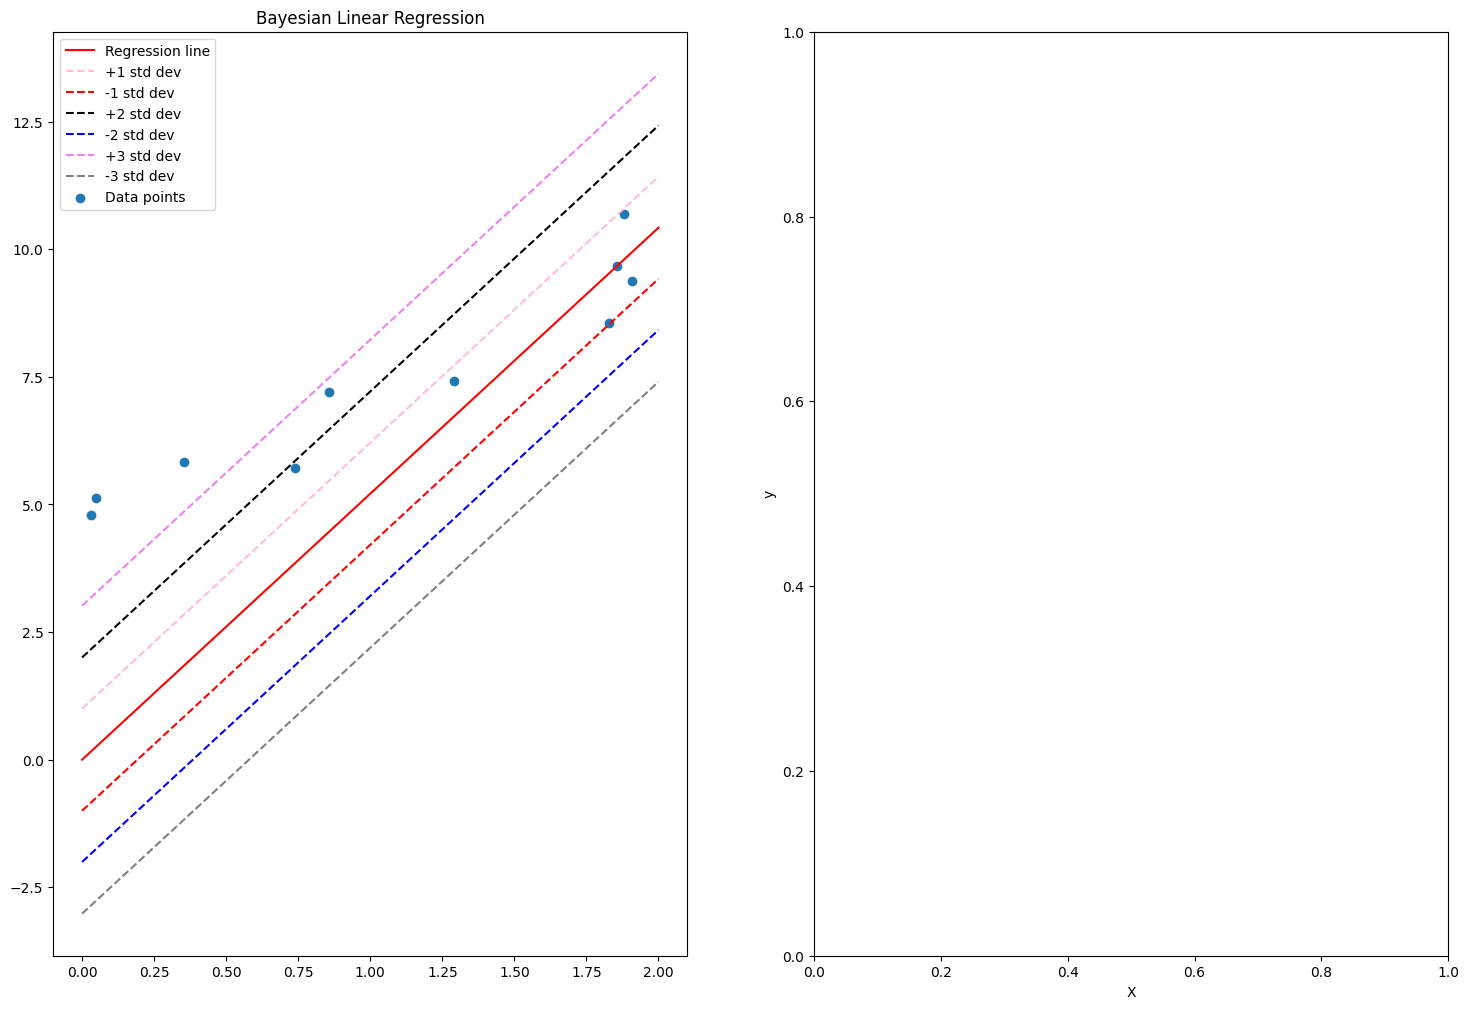

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Create example data (replace with your own data)
fig, ax2 = plt.subplots(1, 2, figsize=(18,12))  # 2 rows, 1 column

# Create Bayesian Ridge regression model
model = BayesianRegression()

# Fit the model to the data
model.fit(data_10[0], data_10[1])

# Generate a linspace for prediction
new_X = np.linspace(0, 2, 10).reshape(-1, 1)  # Adjust the range as needed

# Make predictions on the linspace
predictions, std_dev = model.predict(new_X, return_std=True)

# Plot the regression line
#this may be a bit off, but i tried to make it look like the one above, std_Dev is multipleing while increasing the M idk why
ax2[0].plot(new_X, predictions, color='red', label='Regression line')
print(std_dev)
ax2[0].plot(new_X, predictions + std_dev[0], linestyle='--', color='pink', label='+1 std dev')
ax2[0].plot(new_X, predictions - std_dev[0], linestyle='--', color='red', label='-1 std dev')
ax2[0].plot(new_X, predictions + 2 * std_dev[1], linestyle='--', color='black', label='+2 std dev')
ax2[0].plot(new_X, predictions - 2 * std_dev[1], linestyle='--', color='blue', label='-2 std dev')
ax2[0].plot(new_X, predictions + 3 * std_dev[2], linestyle='--', color='violet', label='+3 std dev')
ax2[0].plot(new_X, predictions - 3 * std_dev[2], linestyle='--', color='gray', label='-3 std dev')
ax2[0].scatter(data_10[0], data_10[1], label='Data points')
plt.xlabel('X')
plt.ylabel('y')
ax2[0].set_title('Bayesian Linear Regression')
ax2[0].legend()
plt.show()
#ignore the empty data graph, i was just testing the code and did not ahve enough time

# Overall for this problem:

I am still a little confused since I think I had to make a contour plot given by the above std_dev but I was able to get something similar with the linear lines. I could not get the contour to work since I have too little time. But overall I understand the purpose it starts with probabilty and why bayesian probabilty would give a better result and why it is better to derive the linear regression. It started from a regular probaility then contuiend it until the end.